In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
from tensorflow.keras.datasets import fashion_mnist

In [28]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


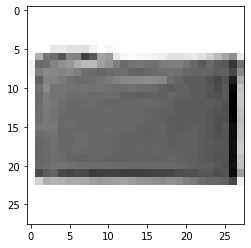

In [30]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

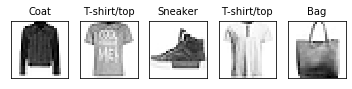

In [31]:

pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255

In [34]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [35]:
y_train.shape

(60000,)

In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [39]:
model = Sequential()

將Filter更改為15、30、60 ， kenel size改為(4, 4) ， 並將神經元改為50

In [40]:
model.add(Conv2D(15, (4, 4), padding = 'same',
         input_shape= (28,28,1),
         activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model.add(Conv2D(30, (4,4), padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [42]:
model.add(Conv2D(60, (4,4), padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(50, activation = 'relu'))

In [45]:
model.add(Dense(10, activation = 'softmax'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 15)        255       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 30)        7230      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 60)          28860     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 60)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)              

learning rate改為0.9453

In [48]:
model.compile(loss = 'mse', optimizer=SGD(lr = 0.9453),
             metrics = ['accuracy'])

batch_size改為150，訓練次數改為15次

In [49]:
model.fit(x_train, y_train, batch_size = 150, epochs = 15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 50s 825us/sample - loss: 0.0496 - accuracy: 0.6198
Epoch 2/15
60000/60000 [==============================] - 48s 799us/sample - loss: 0.0265 - accuracy: 0.8117
Epoch 3/15
60000/60000 [==============================] - 48s 801us/sample - loss: 0.0224 - accuracy: 0.8435
Epoch 4/15
60000/60000 [==============================] - 48s 805us/sample - loss: 0.0201 - accuracy: 0.8610
Epoch 5/15
60000/60000 [==============================] - 48s 806us/sample - loss: 0.0187 - accuracy: 0.8712
Epoch 6/15
60000/60000 [==============================] - 48s 807us/sample - loss: 0.0175 - accuracy: 0.8794
Epoch 7/15
60000/60000 [==============================] - 48s 805us/sample - loss: 0.0167 - accuracy: 0.8864
Epoch 8/15
60000/60000 [==============================] - 49s 809us/sample - loss: 0.0160 - accuracy: 0.8908
Epoch 9/15
60000/60000 [==============================] - 50s 827us/sample - loss: 0.0154 - accuracy: 0.8

In [50]:
result = model.predict_classes(x_test)

In [52]:
def my_predict(n):
    print('CNN預測是', class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap = 'Greys')

CNN預測是 Shirt


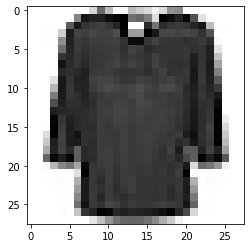

In [60]:
my_predict(145)

In [54]:
from ipywidgets import interact_manual

In [55]:
interact_manual(my_predict, n = (0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [56]:
score = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

正確率為0.8856

In [59]:
loss, acc =score
print('正確率', acc)

正確率 0.8856
